In [ ]:
!git clone https://github.com/davidkim0523/Momentum.git --quiet
!pip install git+https://github.com/quantopian/pyfolio --quiet

You should consider upgrading via the '/home/user/notebook/jupyterenv/bin/python -m pip install --upgrade pip' command.


In [3]:
import numpy as np
import pandas as pd
import pyfolio as pf
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [2]:
def get_price_df(url):
    """Returns price dataframe from given URL
    Parameters
    ----------
    url : string
        URL which contains dataset
    Returns
    -------
    df : dataframe
        Imported price dataframe from URL
    """
    df = pd.read_csv(url).dropna()
    df.index = pd.to_datetime(df['Date'])
    df = df.drop(columns=['Date'])
    return df

In [5]:
url = 'https://raw.githubusercontent.com/davidkim0523/Momentum/main/Data.csv'
prices = get_price_df(url)
prices

,DAX Index,Eurostoxx 50 Index,FTSE 100 Index,S&P 500 Index,Nasdaq 100 Index,Nikkei 225 Index,Topix Index,KOSPI 200 Index,Hang Seng Index,EURUSD,...,UST 5Y,UST 10Y,UST Long,Euro Schatz,Euro Bobl,Euro Bund,Gilt 10Y,JGB 10Y,AGB 3Y,AGB 10Y
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,8768.903220,2443.196385,4663.410938,1110.469607,3472.256961,14612.63447,1183.492979,125.774501,10900.421630,84.7247,...,67.205578,56.429022,54.465692,94.644953,80.314443,70.939571,66.326959,101.388587,91.795922,91.597163
2000-01-04,8544.026504,2347.719768,4483.277751,1068.829363,3213.045685,14791.12124,1188.332027,127.696511,10671.302490,85.1545,...,67.431537,67.431537,54.920204,54.920204,94.663425,80.322243,70.829715,65.427993,91.628770,91.439483
2000-01-05,8417.734710,2292.443832,4391.038865,1070.154279,3172.402802,14251.78078,1131.646032,118.414606,9827.014147,85.3527,...,67.173303,67.173303,54.352064,54.352064,94.663425,80.314443,70.644332,65.011255,91.717262,91.557743
2000-01-06,8383.584378,2278.876102,4336.564450,1062.961874,2991.767767,13875.40650,1088.785889,113.633019,9393.884811,85.4018,...,67.291657,67.291657,54.787638,54.787638,94.672662,80.314443,70.548208,64.939814,91.628770,91.459193
2000-01-07,8801.764861,2353.749870,4365.973950,1105.169939,3217.109974,14077.17415,1103.994327,114.383072,9566.508822,85.1203,...,67.442294,67.442294,55.109584,55.109584,94.866625,80.696670,71.124953,65.231531,91.628770,91.478903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-31,15414.000000,4035.000000,7023.500000,4202.400000,13686.500000,28965.00000,1928.500000,427.700000,28958.000000,91.7084,...,124.414100,124.414100,158.125000,158.125000,112.045000,134.720000,169.940000,128.270000,99.785000,98.350000
2021-06-01,15567.000000,4070.000000,7078.000000,4198.600000,13648.750000,28760.00000,1920.000000,430.100000,29350.000000,91.6010,...,124.367200,124.367200,157.718800,157.718800,112.040000,134.710000,169.830000,127.890000,99.800000,98.370000
2021-06-02,15583.000000,4084.000000,7095.000000,4206.200000,13673.750000,28900.00000,1940.500000,429.500000,29144.000000,91.5835,...,124.421900,124.421900,158.093800,158.093800,112.050000,134.820000,170.150000,128.200000,99.800000,98.380000


# 5, 10, 20, 60, 120 이동평균선 구하기

In [6]:
df = prices
df['MA5'] = df['Nasdaq 100 Index'] .rolling(window=5).mean()# 5일 이동평균선
df['MA10'] = df['Nasdaq 100 Index'].rolling(window=10).mean()# 10일 이동평균선
df['MA20'] = df['Nasdaq 100 Index'].rolling(window=20).mean()# 20일 이동평균선
df['MA60'] = df['Nasdaq 100 Index'].rolling(window=60).mean()# 60일 이동평균선
df['MA120'] = df['Nasdaq 100 Index'].rolling(window=120).mean()# 120일 이동평균선
df = df[120:]

# 5 - 10 - 20 - 60 - 120 골든 크로스(정배열)은 매수 시그널

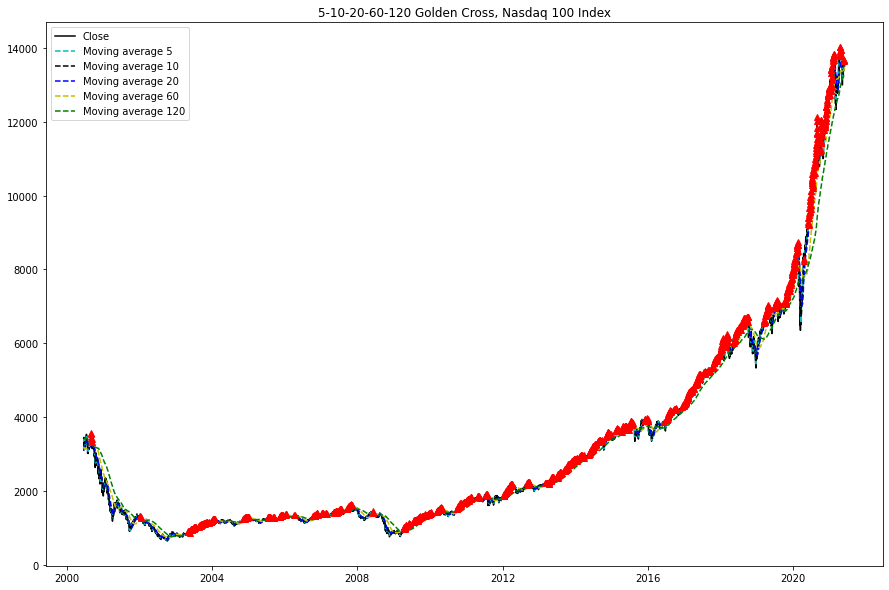

In [7]:
plt.figure(figsize=(15,10))
plt.title('5-10-20-60-120 Golden Cross, Nasdaq 100 Index')
plt.plot(df.index, df['Nasdaq 100 Index'], color = 'k', label='Close')
plt.plot(df.index, df['MA5'], 'c--', label = 'Moving average 5')
plt.plot(df.index, df['MA10'], 'k--', label = 'Moving average 10')
plt.plot(df.index, df['MA20'], 'b--', label = 'Moving average 20')
plt.plot(df.index, df['MA60'], 'y--', label = 'Moving average 60')
plt.plot(df.index, df['MA120'], 'g--', label = 'Moving average 120')

for i in range(len(df['Nasdaq 100 Index'])):
    if df.MA5.values[i] >  df.MA10.values[i] and df.MA10.values[i] > df.MA20.values[i] and df.MA20.values[i] > df.MA60.values[i] and df.MA60.values[i] > df.MA120.values[i]:
        plt.plot(df.index.values[i], df['Nasdaq 100 Index'].values[i], 'r^') # 빨간색 삼각형은 매수 시그널

plt.legend(loc='best')
plt.show()

# 5 - 10 - 20 - 60 - 120 데드 크로스(역배열)은 매도 시그널

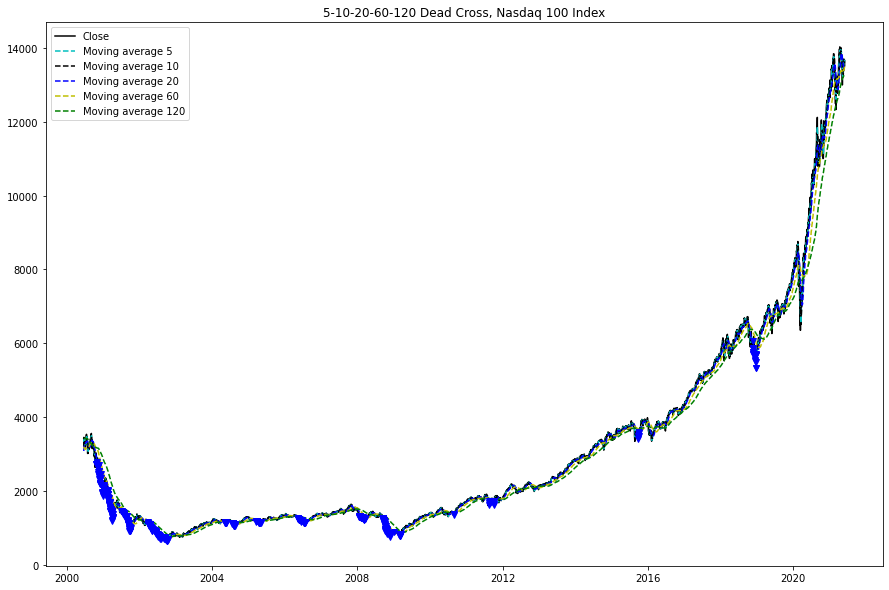

In [8]:
plt.figure(figsize=(15,10))
plt.title('5-10-20-60-120 Dead Cross, Nasdaq 100 Index')
plt.plot(df.index, df['Nasdaq 100 Index'], color = 'k', label='Close')
plt.plot(df.index, df['MA5'], 'c--', label = 'Moving average 5')
plt.plot(df.index, df['MA10'], 'k--', label = 'Moving average 10')
plt.plot(df.index, df['MA20'], 'b--', label = 'Moving average 20')
plt.plot(df.index, df['MA60'], 'y--', label = 'Moving average 60')
plt.plot(df.index, df['MA120'], 'g--', label = 'Moving average 120')
for i in range(len(df['Nasdaq 100 Index'])):
    if df.MA5.values[i] <  df.MA10.values[i] and df.MA10.values[i] < df.MA20.values[i] and df.MA20.values[i] < df.MA60.values[i] and df.MA60.values[i] < df.MA120.values[i]:
        plt.plot(df.index.values[i], df['Nasdaq 100 Index'].values[i], 'bv') # 파란색 역삼각형은 매도시그널

plt.legend(loc='best')
plt.show()

# GoldenDeadCross: 정배열과 역배열을 이용한 전략

In [9]:
class GoldenDeadCross():
    def __init__(self, prices, lookback_period, holding_period, cost=0.001, weightings='emv', long_only=False, show_analytics=True):   
        self.returns = self.get_returns(prices)
        self.holding_returns = self.get_holding_returns(prices, holding_period)
        self.signal = self.GoldenDeadCrossSignal(prices, long_only)

        if weightings == 'ew':
            self.cs_risk_weight = self.equal_weight(self.signal)
        elif weightings == 'emv':
            self.cs_risk_weight = self.equal_marginal_volatility(self.returns, self.signal)

        self.rebalance_weight = 1 / holding_period
        self.cost = self.transaction_cost(self.signal, cost)

        self.port_rets_wo_cash = self.backtest(self.holding_returns, self.signal, self.cost, self.rebalance_weight, self.cs_risk_weight)
        
        self.ts_risk_weight = self.volatility_targeting(self.port_rets_wo_cash)
        
        self.port_rets = self.port_rets_wo_cash * self.ts_risk_weight
        
        if show_analytics == True:
            self.performance_analytics(self.port_rets)                          
                
    def get_returns(self, prices):
        """Returns the historical daily returns
        
        Paramters
        ---------
        prices : dataframe
            Historical daily prices
            
        Returns
        -------
        returns : dataframe
            Historical daily returns
        """
        returns = prices.pct_change().fillna(0)
        return returns

    def get_holding_returns(self, prices, holding_period):
        """Returns the periodic returns for each holding period
        
        Paramters
        ---------
        returns : dataframe
            Historical daily returns
        holding_period : int
            Holding Period
            
        Returns
        -------
        holding_returns : dataframe
            Periodic returns for each holding period. Pulled by N (holding_period) days forward to keep inline with trading signals.
        """
        holding_returns = prices.pct_change(periods=holding_period).shift(-holding_period).fillna(0)
        return holding_returns

    def GoldenDeadCrossSignal(self, prices, long_only=False):
        """Returns Golden, Dead Cross Signal 
        
        Parameters
        ----------
        prices : dataframe
            Historical daily prices
        long_only : bool, optional
            Indicator for long-only momentum, False is default value
        
        Returns
        -------
        returns : dataframe
            Golden, Dead Cross signals     
        """    
        MA5= prices.rolling(5).mean().fillna(0)
        MA10 = prices.rolling(10).mean().fillna(0)
        MA20= prices.rolling(20).mean().fillna(0)
        MA60 = prices.rolling(60).mean().fillna(0)
        MA120= prices.rolling(120).mean().fillna(0)

        long_signal = (((MA5>MA10).applymap(self.bool_converter) + (MA10>MA20).applymap(self.bool_converter) + (MA20>MA60).applymap(self.bool_converter) +\
                      (MA60>MA120).applymap(self.bool_converter) ).replace(3,0).replace(2,0).replace(1,0))/4
        short_signal = ((-(MA5<MA10).applymap(self.bool_converter) -(MA10>MA20).applymap(self.bool_converter) -(MA20>MA60).applymap(self.bool_converter) -\
                      (MA60>MA120).applymap(self.bool_converter) ).replace(-3,0).replace(-2,0).replace(-1,0))/4
        
        if long_only == True:
            signal = long_signal
        else:
            signal = long_signal + short_signal
        return signal


    def equal_weight(self, signal):
        """Returns Equal Weights
        Parameters
        ----------
        signal : dataframe
            Momentum signal dataframe
        Returns
        -------
        weight : dataframe
            Equal weights for cross-asset momentum portfolio
        """
        total_signal = 1 / abs(signal).sum(axis=1)
        total_signal.replace([np.inf, -np.inf], 0, inplace=True)
        weight = pd.DataFrame(index=signal.index, columns=signal.columns).fillna(value=1)
        weight = weight.mul(total_signal, axis=0)
        return weight

    def equal_marginal_volatility(self, returns, signal):
        """Returns Equal Marginal Volatility (Inverse Volatility)
        
        Parameters
        ----------
        returns : dataframe
            Historical daily returns
        signal : dataframe
            Momentum signal dataframe
        Returns
        -------
        weight : dataframe
            Weights using equal marginal volatility
        """
        vol = (returns.rolling(252).std() * np.sqrt(252)).fillna(0)
        vol_signal = vol * abs(signal)
        inv_vol = 1 / vol_signal
        inv_vol.replace([np.inf, -np.inf], 0, inplace=True)
        weight = inv_vol.div(inv_vol.sum(axis=1), axis=0).fillna(0)
        return weight

    def volatility_targeting(self, returns, target_vol=0.01):
        """Returns Weights based on Vol Target
        
        Parameters
        ----------
        returns : dataframe
            Historical daily returns of backtested portfolio
        target_vol : float, optional
            Target volatility, Default target volatility is 1%
        Returns
        -------
        weights : dataframe
            Weights using equal marginal volatility
        """
        weight = target_vol / (returns.rolling(252).std() * np.sqrt(252)).fillna(0)
        weight.replace([np.inf, -np.inf], 0, inplace=True)
        weight = weight.shift(1).fillna(0)
        return weight

    def transaction_cost(self, signal, cost=0.001):
        """Returns Transaction Costs
        
        Parameters
        ----------
        signal : dataframe
            Momentum signal dataframe
        cost : float, optional
            Transaction cost (%) per each trade. The default is 0.001.
        Returns
        -------
        cost_df : dataframe
            Transaction cost dataframe
        """
        cost_df = (signal.diff() != 0).applymap(self.bool_converter) * cost
        cost_df.iloc[0] = 0
        return cost_df
    
    def backtest(self, returns, signal, cost, rebalance_weight, weighting):
        """Returns Portfolio Returns without Time-Series Risk Weights
        Parameters
        ----------
        returns : dataframe
            Historical daily returns
        signal : dataframe
            Momentum signal dataframe
        cost : dataframe
            Transaction cost dataframe
        rebalance_weight : float
            Rebalance weight
        weighting : dataframe
            Weighting dataframe
        Returns
        -------
        port_rets : dataframe
            Portfolio returns dataframe without applying time-series risk model
        """
        port_rets = ((signal * returns - cost) * rebalance_weight * weighting).sum(axis=1)
        return port_rets

    def performance_analytics(self, returns):
        """Returns Perforamnce Analytics using pyfolio package
        Parameters
        ----------
        returns : series
            backtestd portfolio returns
        Returns
        -------
        None
        """
        pf.create_returns_tear_sheet(returns)

    def bool_converter(self, bool_var):
        """Returns Integer Value from Boolean Value
        Parameters
        ----------
        bool_var : boolean
            Boolean variables representing trade signals
        Returns
        -------
        result : int
            Integer variables representing trade signals
        """
        if bool_var == True:
            result = 1
        elif bool_var == False:
            result = 0
        return result

# 전체 Asset을 포함한 포트폴리오 백테스팅 결과

Start date,2000-01-03
End date,2021-06-04
Total months,266
,Backtest
Annual return,1.219%
Cumulative returns,30.839%
Annual volatility,1.516%
Sharpe ratio,0.81
Calmar ratio,0.11
Stability,0.64
Max drawdown,-11.442%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,11.44,2013-03-29,2020-02-21,NaT,NaN
1,4.51,2000-12-21,2001-02-21,2003-04-03,596
2,3.29,2009-04-23,2010-01-13,2010-12-08,425
3,2.05,2006-05-05,2007-03-12,2007-05-07,262
4,2.03,2012-05-22,2012-11-05,2013-01-07,165


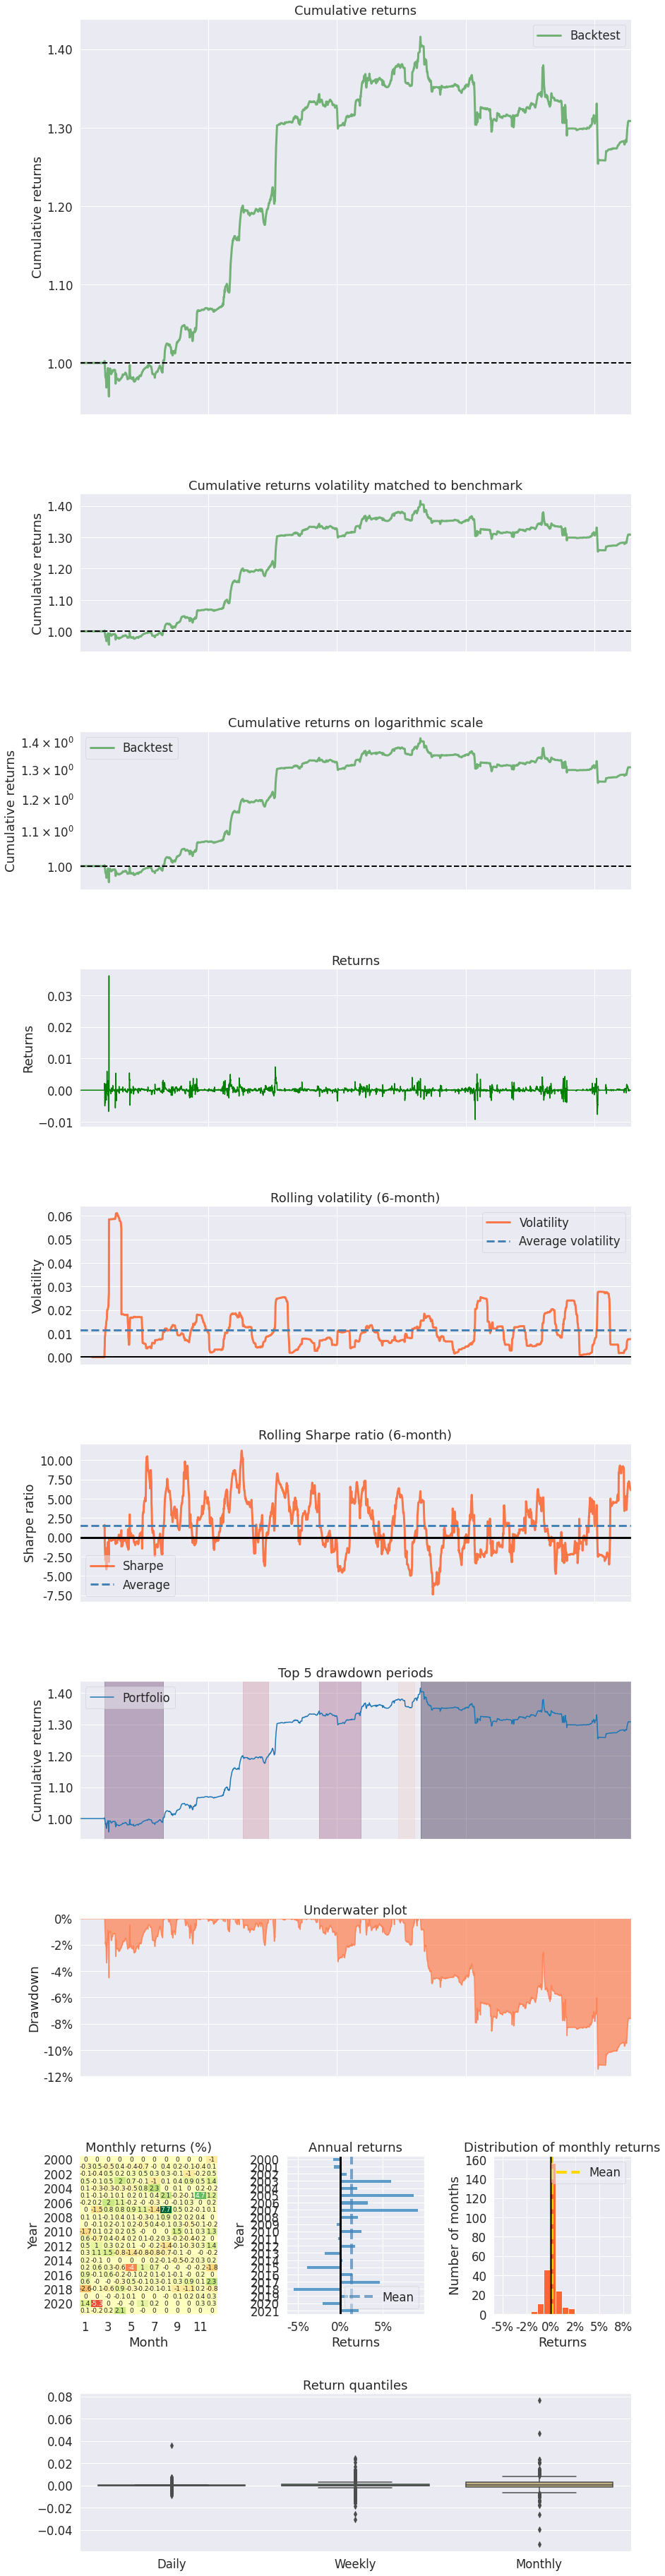

In [10]:
if __name__ == "__main__":
    url = 'https://raw.githubusercontent.com/davidkim0523/Momentum/main/Data.csv'
    prices = get_price_df(url)
    lookback_period = 120
    holding_period = 20
    momentum = GoldenDeadCross(prices, lookback_period, holding_period, cost=0.001, weightings='emv')

In [11]:
momentum.signal # 시그널 벡터 출력하기

,DAX Index,Eurostoxx 50 Index,FTSE 100 Index,S&P 500 Index,Nasdaq 100 Index,Nikkei 225 Index,Topix Index,KOSPI 200 Index,Hang Seng Index,EURUSD,...,UST 5Y,UST 10Y,UST Long,Euro Schatz,Euro Bobl,Euro Bund,Gilt 10Y,JGB 10Y,AGB 3Y,AGB 10Y
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-31,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-06-01,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-06-02,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


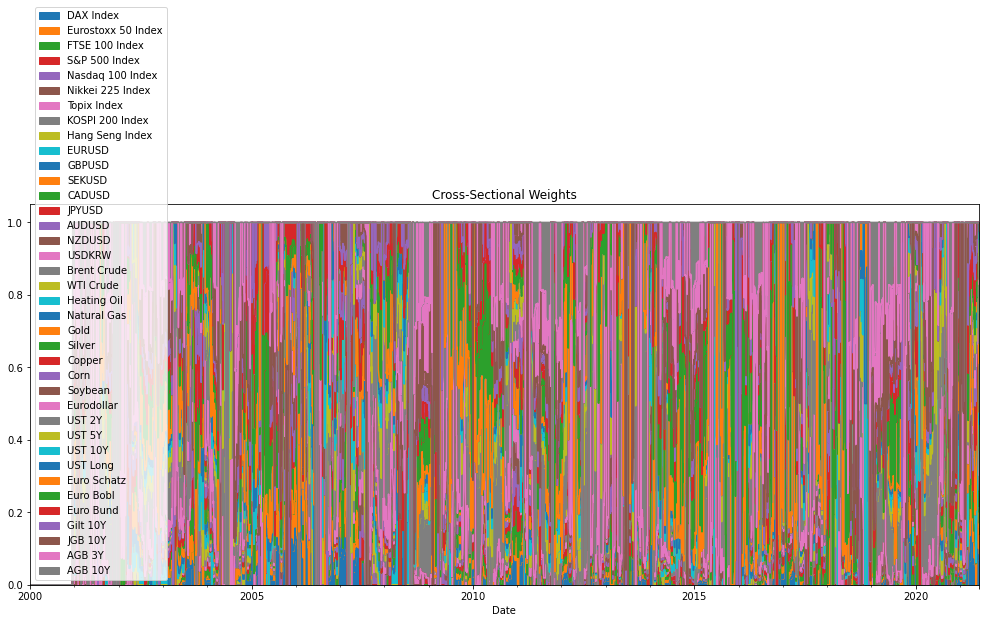

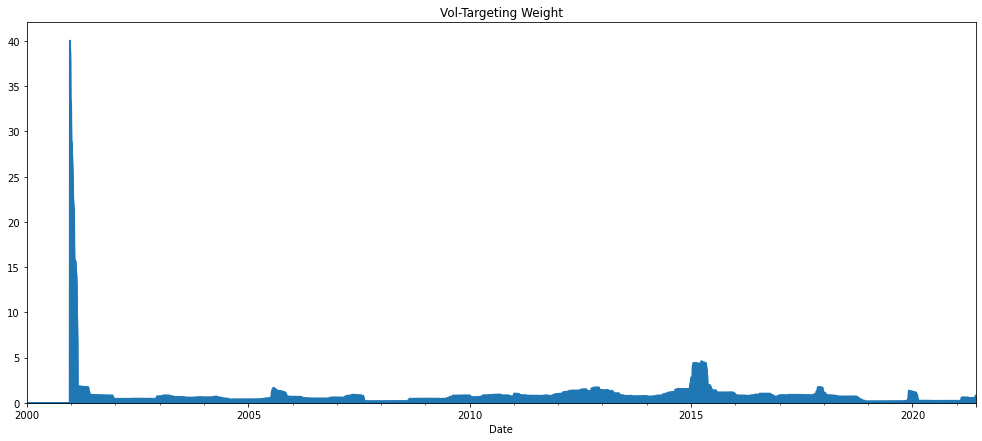

In [20]:
# All asset Portfolio
# Cross-Sectional Weights
momentum.cs_risk_weight.plot.area(figsize=(17,7),title=('Cross-Sectional Weights'))
plt.legend()
plt.show()

# Time-Series Weights
momentum.ts_risk_weight.plot.area(figsize=(17,7),title='Vol-Targeting Weight')
plt.show()

# 각 Asset의 횡적, 종적 리스크 가중치 시각화

In [12]:
equity, currency, commodity, fixedincome = prices.iloc[:,0:9], prices.iloc[:,9:17], prices.iloc[:,17:26], prices.iloc[:,26:]

In [13]:
# Parameter Setup
lookback_period = 120
holding_period = 20
n_selection = 3

In [14]:
# Implementation of Golden, Dead Cross Strategy for each Asset Class
# Object = CrossAssetMomentum()
equity_mom = GoldenDeadCross(equity, lookback_period, holding_period, show_analytics=False)
currency_mom = GoldenDeadCross(currency, lookback_period, holding_period, show_analytics=False)
commodity_mom = GoldenDeadCross(commodity, lookback_period, holding_period, show_analytics=False)
fixedincome_mom = GoldenDeadCross(fixedincome, lookback_period, holding_period, show_analytics=False)

No handles with labels found to put in legend.


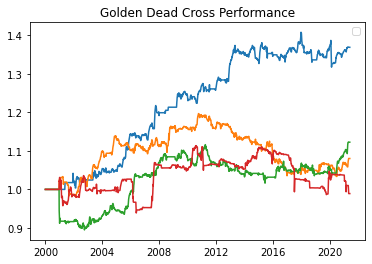

In [15]:
# Cumulative Compounded Returns for Each Asset Class in One Plot
plt.title('Golden Dead Cross Performance')
plt.plot((equity_mom.port_rets+1).cumprod())
plt.plot((currency_mom.port_rets+1).cumprod())
plt.plot((commodity_mom.port_rets+1).cumprod())
plt.plot((fixedincome_mom.port_rets+1).cumprod())
plt.legend()
plt.show()

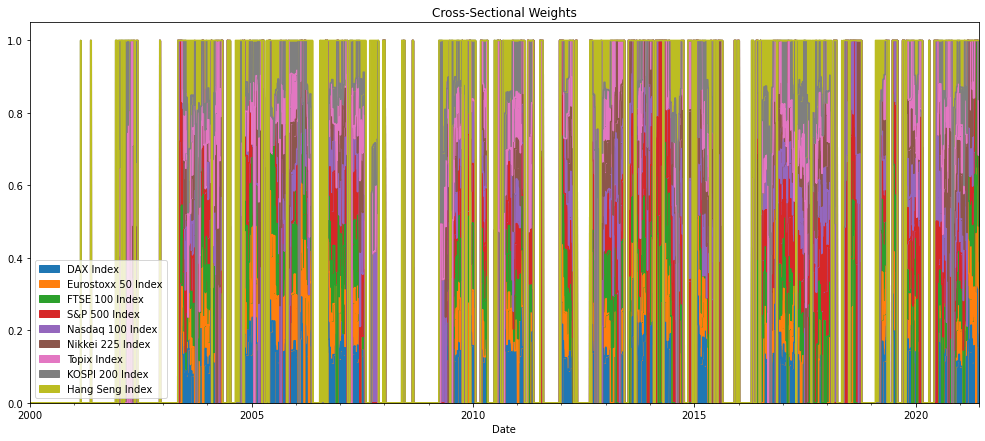

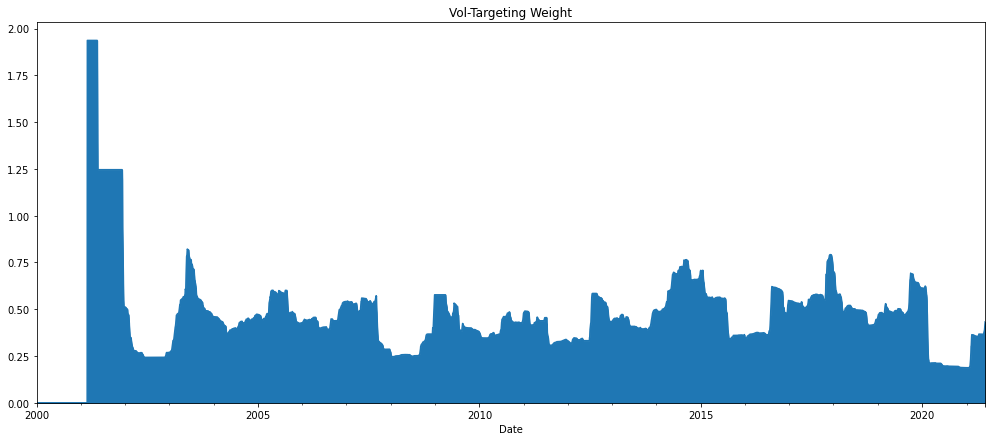

In [16]:
# 1. Equity Portfolio
# Cross-Sectional Weights
equity_mom.cs_risk_weight.plot.area(figsize=(17,7),title=('Cross-Sectional Weights'))
plt.legend()
plt.show()

# Time-Series Weights
equity_mom.ts_risk_weight.plot.area(figsize=(17,7),title='Vol-Targeting Weight')
plt.show()

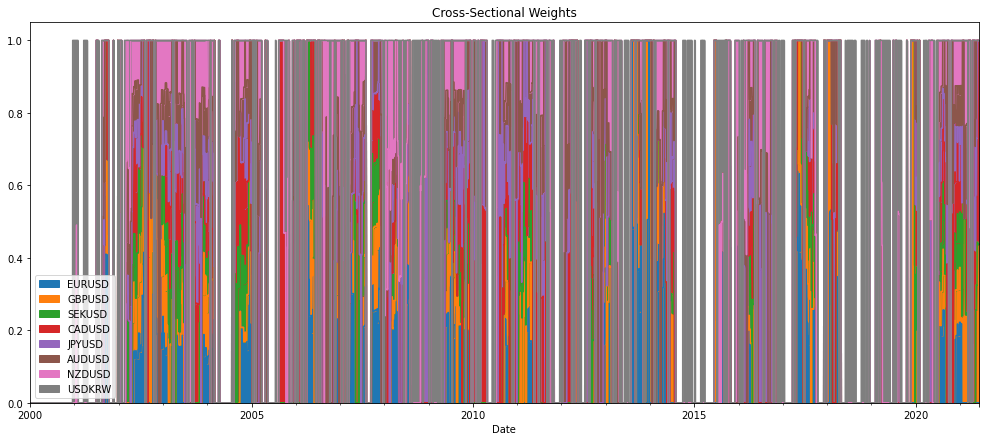

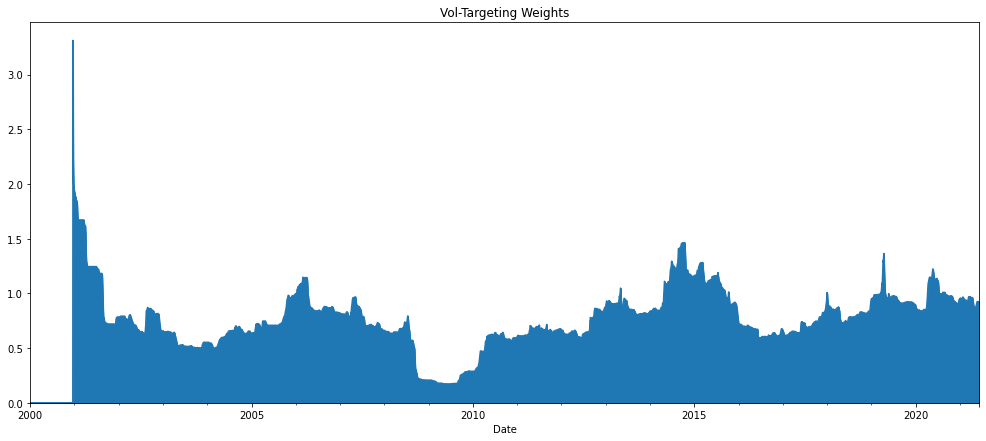

In [17]:
# 2. Currency Portfolio
# Cross-Sectional Weights
currency_mom.cs_risk_weight.plot.area(figsize=(17,7),title='Cross-Sectional Weights')
plt.legend()
plt.show()

# Time-Series Weights
currency_mom.ts_risk_weight.plot.area(figsize=(17,7),title='Vol-Targeting Weights')
plt.show()

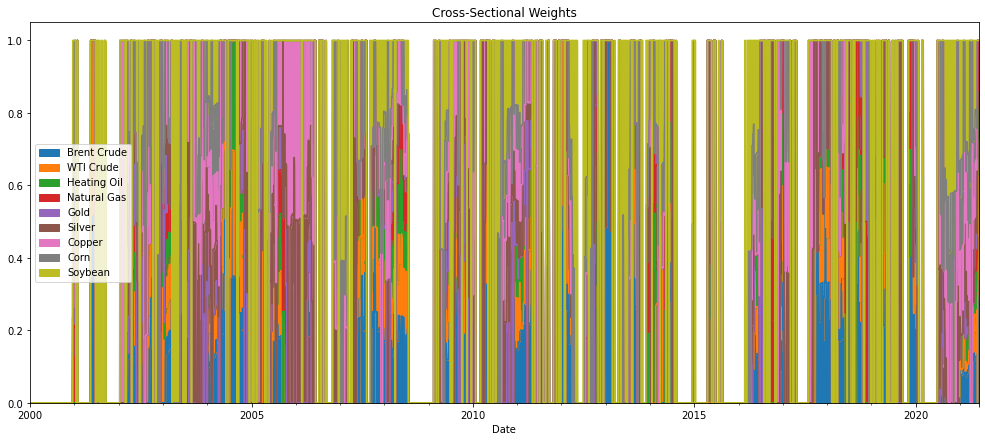

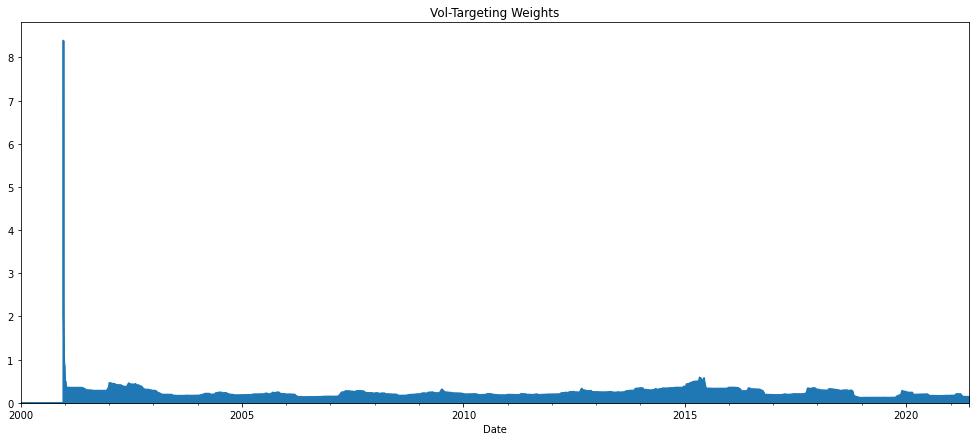

In [18]:
# 3. Commodity Portfolio
# Cross-Sectional Weights
commodity_mom.cs_risk_weight.plot.area(figsize=(17,7),title='Cross-Sectional Weights')
plt.legend()
plt.show()

# Time-Series Weights
commodity_mom.ts_risk_weight.plot.area(figsize=(17,7),title='Vol-Targeting Weights')
plt.show()

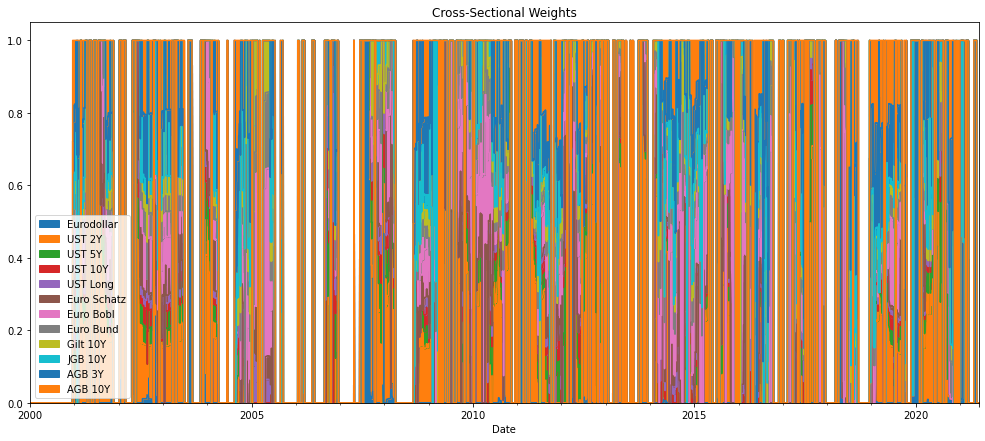

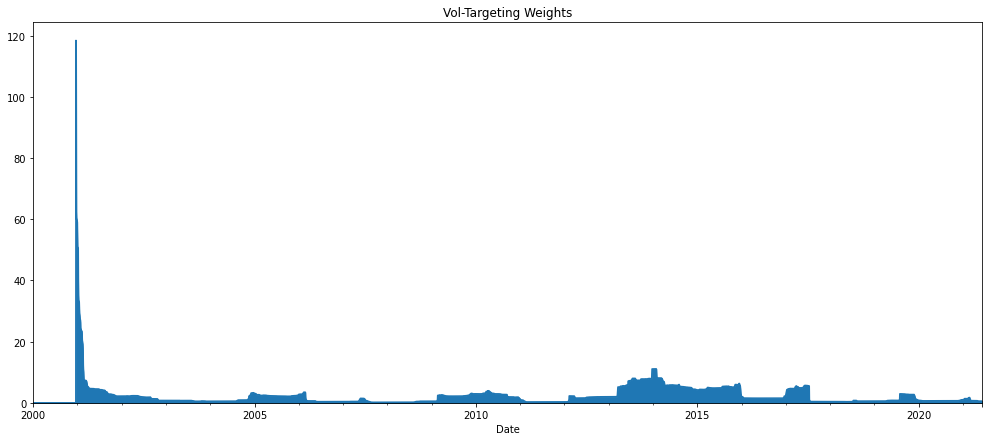

In [19]:
# 4. Fixed Income Portfolio
# Cross-Sectional Weights
fixedincome_mom.cs_risk_weight.plot.area(figsize=(17,7),title='Cross-Sectional Weights')
plt.legend()
plt.show()

# Time-Series Weights
fixedincome_mom.ts_risk_weight.plot.area(figsize=(17,7),title='Vol-Targeting Weights')
plt.show()